Importing Libraries


In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

Importing Dataset

In [95]:
df=pd.read_csv('winequalityN.csv')
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [96]:
df.shape

(6497, 13)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [98]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Exploratory Data Analysis

In [99]:
df.isna().sum()

,0
type,0
fixed acidity,10
volatile acidity,8
citric acid,3
residual sugar,2
chlorides,2
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,9


In [100]:
for col in df.columns:
  if df[col].isna().sum()>0:
    df[col].fillna(df[col].mean(),inplace=True)

df.isnull().sum()

,0
type,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


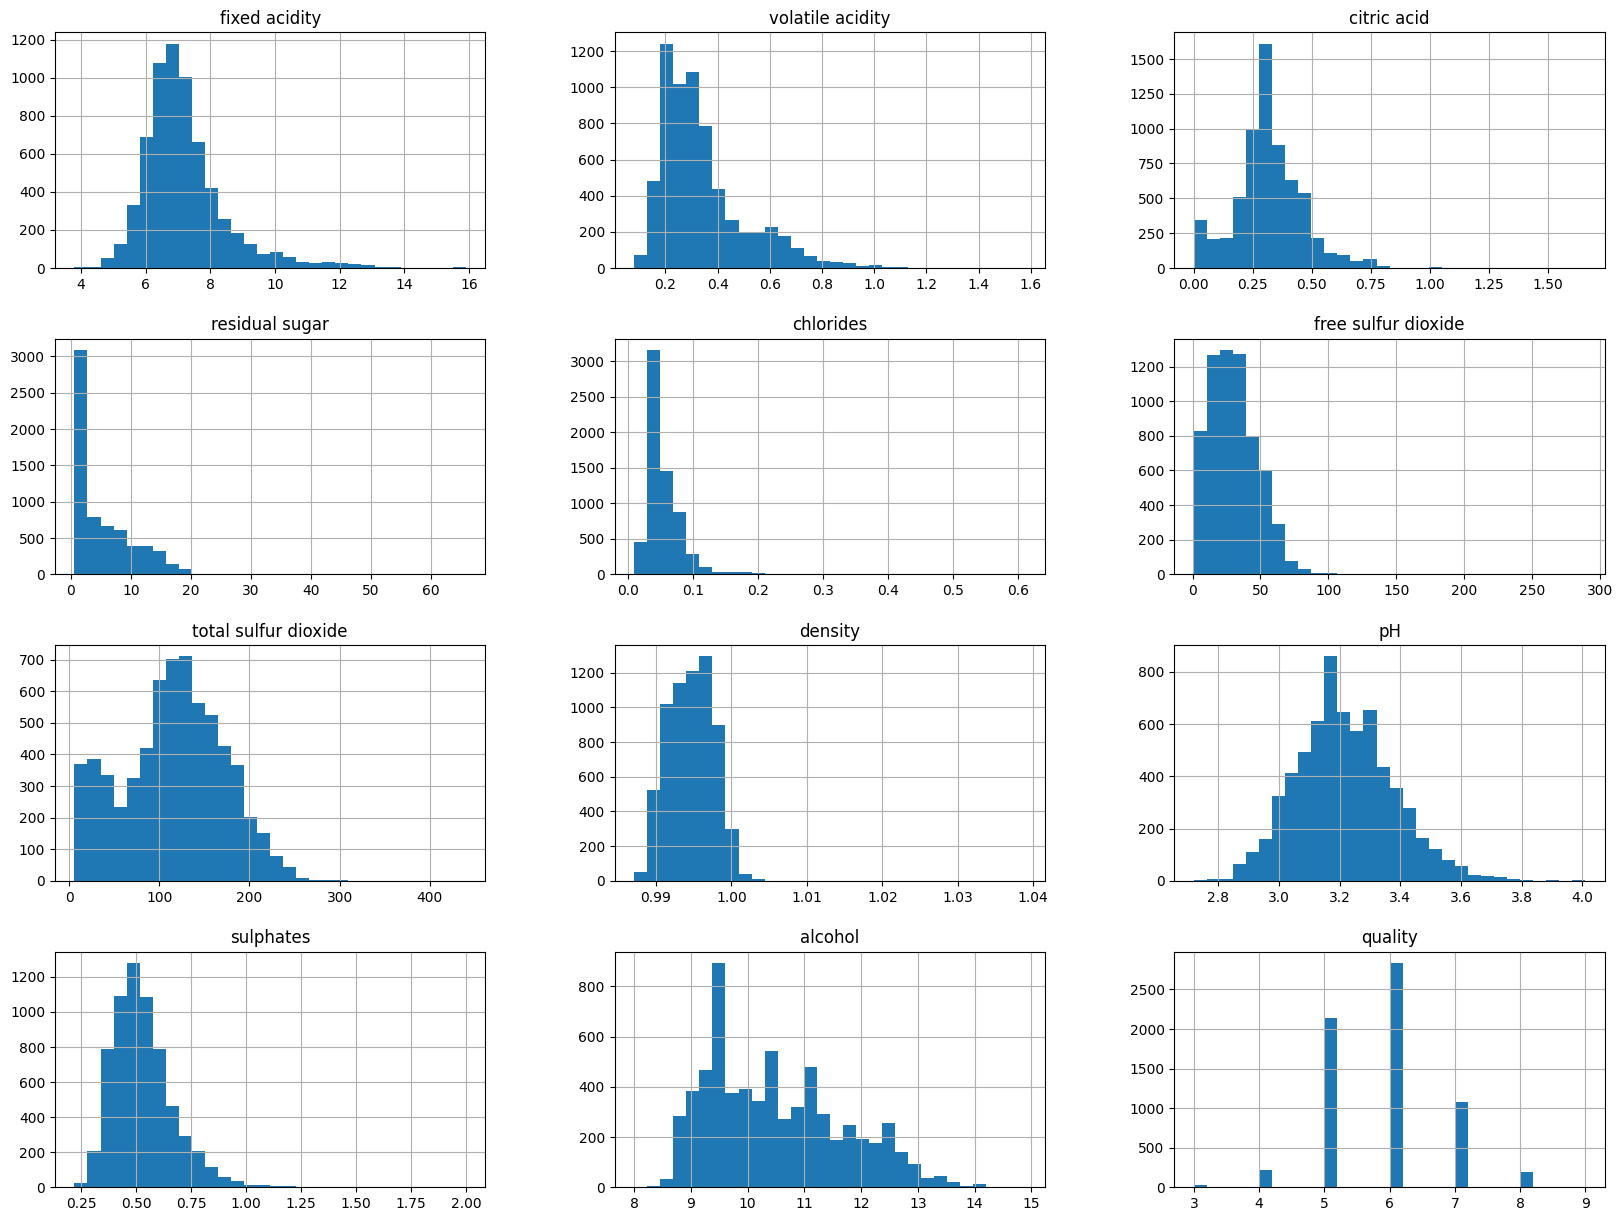

In [101]:
df.hist(bins=30,figsize=(20,15))
plt.show()

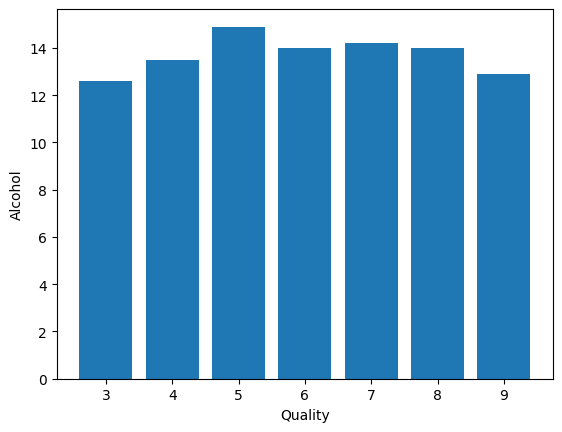

In [102]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('Alcohol')
plt.show()

In [103]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [104]:
from sklearn.preprocessing import LabelEncoder

In [105]:
for col in df.columns:
  if df[col].dtype=='object':
    label_encoder=LabelEncoder()
    df[col]=label_encoder.fit_transform(df[col])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   int64  
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


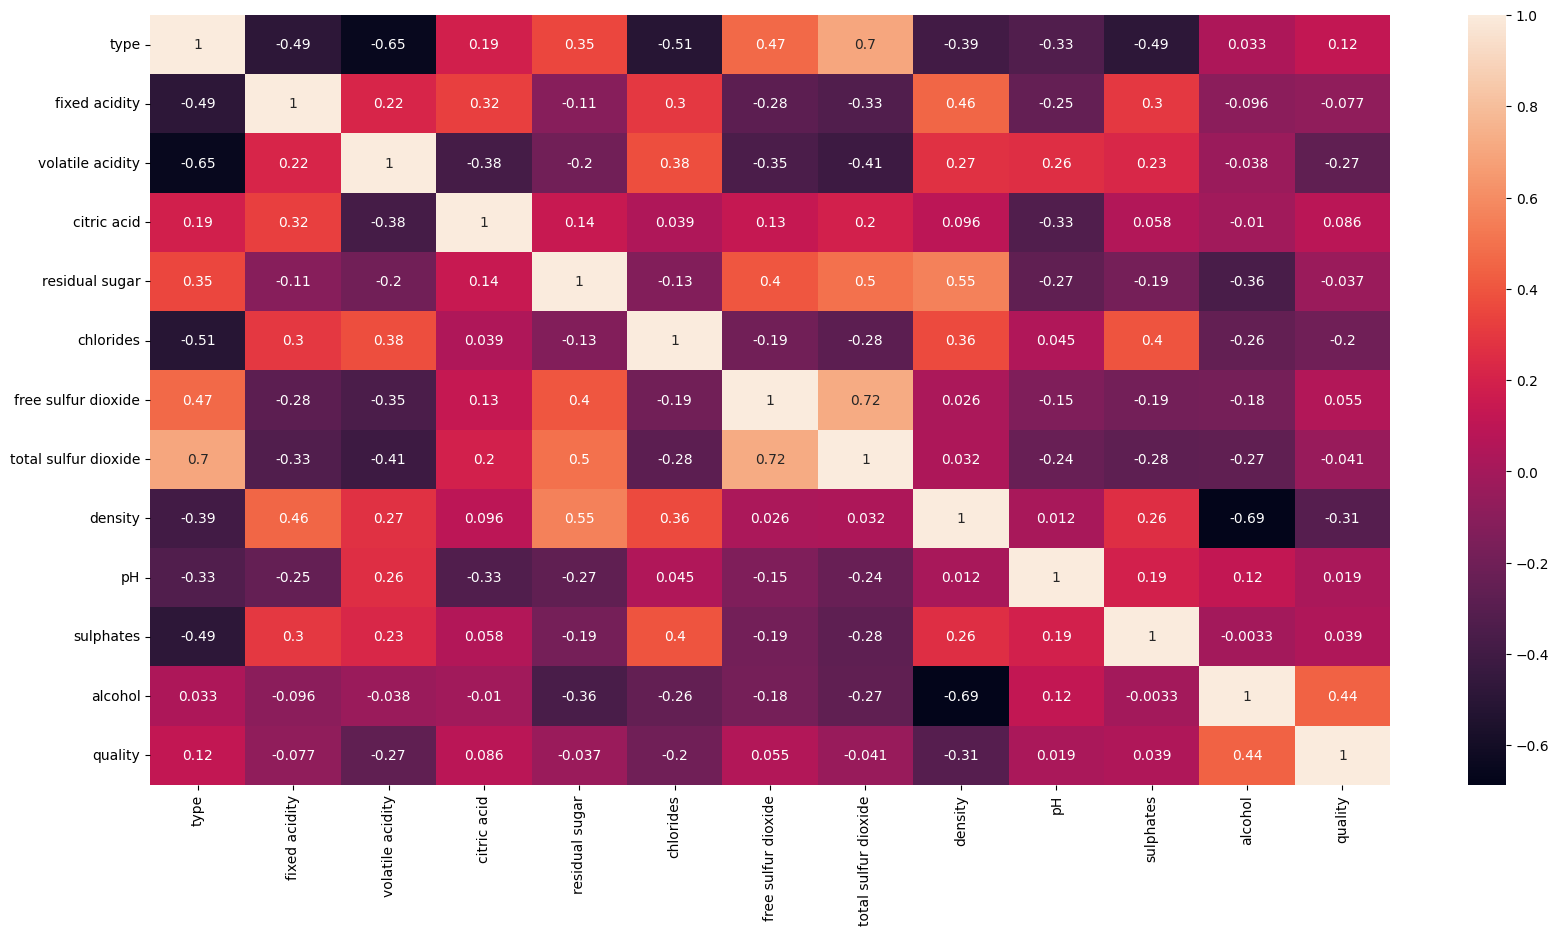

In [106]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [107]:
df=df.drop('total sulfur dioxide',axis=1)

Model Deployment

In [108]:
df['best quality']=[1 if x>5 else 0 for x in df.quality]
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,1.0010,3.00,0.45,8.8,6,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,0.9940,3.30,0.49,9.5,6,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,0.9951,3.26,0.44,10.1,6,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,0.9956,3.19,0.40,9.9,6,1


In [109]:
features=df.drop(['quality','best quality'],axis=1)
target=df['best quality']

X_train, X_test, y_train, y_test=train_test_split(features, target, test_size=0.2, random_state=40)
X_train.shape, X_test.shape

((5197, 11), (1300, 11))

In [110]:
min_max_scaler=MinMaxScaler()
X_train=min_max_scaler.fit_transform(X_train)
X_test=min_max_scaler.transform(X_test)

In [111]:
import sklearn.model_selection

In [112]:
models={
    'Logistic Regression':LogisticRegression(),
    'SVM':SVC(kernel='rbf'),
    'XGBClassifier':XGBClassifier(
    n_estimators=200,
    subsample=0.8,
    learning_rate=0.4,
    max_depth=8,
    reg_lambda=8,
    eval_metric='auc',
    colsample_bytree=0.8)
}

for name, model in models.items():
  model.fit(X_train, y_train)
  training_accuracy=metrics.roc_auc_score(y_train, model.predict(X_train))
  validation_accuracy=metrics.roc_auc_score(y_test, model.predict(X_test))
  print(name)
  print(f'Training Accuracy: {training_accuracy*100:.2f}%')
  print(f'Validation Accuracy: {validation_accuracy*100:.2f}%')

Logistic Regression
Training Accuracy: 70.28%
Validation Accuracy: 69.50%
SVM
Training Accuracy: 70.69%
Validation Accuracy: 69.58%
XGBClassifier
Training Accuracy: 100.00%
Validation Accuracy: 81.64%


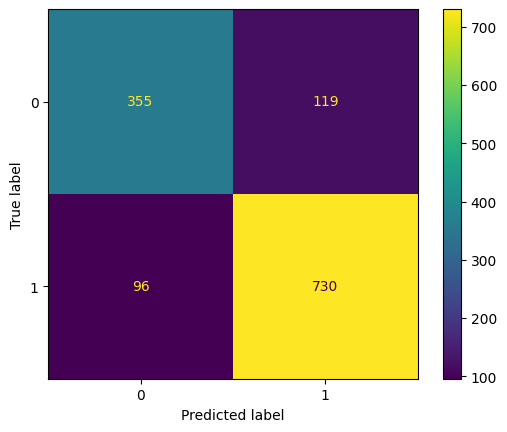

In [117]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, models['XGBClassifier'].predict(X_test))).plot()

In [118]:
print('Classification Report:')
print(metrics.classification_report(y_test, models['XGBClassifier'].predict(X_test)))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       474
           1       0.86      0.88      0.87       826

    accuracy                           0.83      1300
   macro avg       0.82      0.82      0.82      1300
weighted avg       0.83      0.83      0.83      1300

